## Poboljšanje rezultata

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("clean_data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                563 non-null    int64  
 1   radius_mean              563 non-null    float64
 2   texture_mean             563 non-null    float64
 3   perimeter_mean           563 non-null    float64
 4   area_mean                563 non-null    float64
 5   smoothness_mean          563 non-null    float64
 6   compactness_mean         563 non-null    float64
 7   concavity_mean           563 non-null    float64
 8   concave points_mean      563 non-null    float64
 9   symmetry_mean            563 non-null    float64
 10  radius_se                563 non-null    float64
 11  perimeter_se             563 non-null    float64
 12  area_se                  563 non-null    float64
 13  smoothness_se            563 non-null    float64
 14  compactness_se           5

In [6]:
y = df['diagnosis']

In [7]:
y

0      1
1      1
2      1
3      1
4      1
      ..
558    1
559    1
560    1
561    1
562    0
Name: diagnosis, Length: 563, dtype: int64

In [8]:
X = df.drop(['diagnosis'], axis=1)

In [9]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,1.0950,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.5435,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.7456,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.4956,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.7572,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,1.1760,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
559,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.7655,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
560,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.4564,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
561,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.7260,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

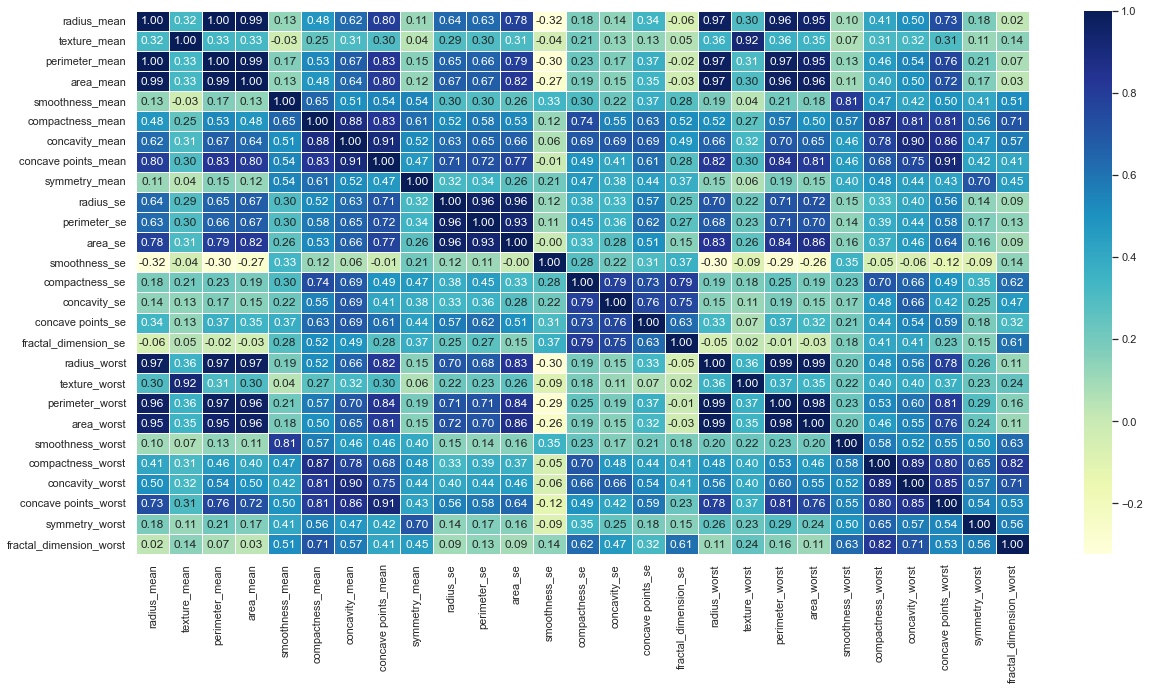

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(X_train.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.show()

In [12]:
corrs = X_train.corr()
highly_correlated = {}
for i in range(len(corrs.columns)): 
    for j in range(i):
        if corrs.iloc[i,j] > 0.95:
            f1 = corrs.columns[i]
            f2 = corrs.columns[j]
            corr = corrs.iloc[i,j]
            highly_correlated[(f1,f2)] = corr

for features, correlation in highly_correlated.items():
    print(f"Features: {features}, Correlation: {correlation}")

Features: ('perimeter_mean', 'radius_mean'), Correlation: 0.9975633306664451
Features: ('area_mean', 'radius_mean'), Correlation: 0.9909885883504445
Features: ('area_mean', 'perimeter_mean'), Correlation: 0.9896209501668256
Features: ('perimeter_se', 'radius_se'), Correlation: 0.9623903946614926
Features: ('area_se', 'radius_se'), Correlation: 0.9562897331021438
Features: ('radius_worst', 'radius_mean'), Correlation: 0.9705918687962352
Features: ('radius_worst', 'perimeter_mean'), Correlation: 0.9716719289857916
Features: ('radius_worst', 'area_mean'), Correlation: 0.9705496626581978
Features: ('perimeter_worst', 'radius_mean'), Correlation: 0.9642713547607631
Features: ('perimeter_worst', 'perimeter_mean'), Correlation: 0.9710056170523945
Features: ('perimeter_worst', 'area_mean'), Correlation: 0.9646955949290082
Features: ('perimeter_worst', 'radius_worst'), Correlation: 0.9934782949679098
Features: ('area_worst', 'area_mean'), Correlation: 0.9639589214445046
Features: ('area_worst',

In [13]:
X_train.drop(['perimeter_mean', 'area_mean', 'radius_worst', 'area_worst', 'perimeter_worst', 'perimeter_se', 'area_se'], axis=1, inplace=True)

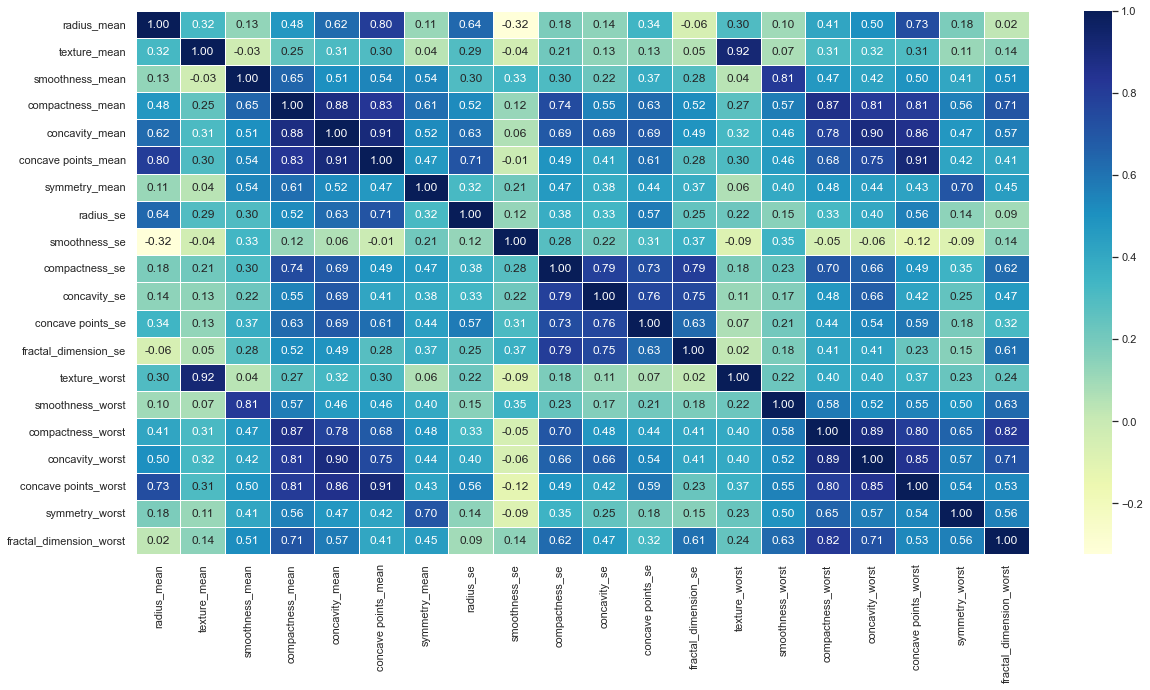

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(X_train.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.show()

In [15]:
X_test.drop(['perimeter_mean', 'area_mean', 'radius_worst', 'area_worst', 'perimeter_worst', 'perimeter_se', 'area_se'], axis=1, inplace=True)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.fit_transform(X_test)

array([[-0.92936594, -1.03905683, -1.37404301, ..., -1.22306841,
        -1.03757697, -0.95623951],
       [ 1.50544684,  0.67136044,  0.44167345, ...,  0.90548052,
         0.22696164, -0.03860594],
       [-0.72420204, -0.9364318 ,  0.03015162, ..., -0.43453813,
        -0.36506422, -0.95861526],
       ...,
       [-0.66687683, -0.25470834,  1.63592348, ...,  0.45070897,
        -0.39368178,  0.52919838],
       [ 0.49169579, -1.79164043,  2.25967191, ...,  1.09081551,
         0.60077857,  1.02216658],
       [ 0.73004797,  0.07027094,  0.50252695, ...,  1.00982879,
         0.78321554,  0.44961075]])

In [17]:
from sklearn.decomposition import PCA

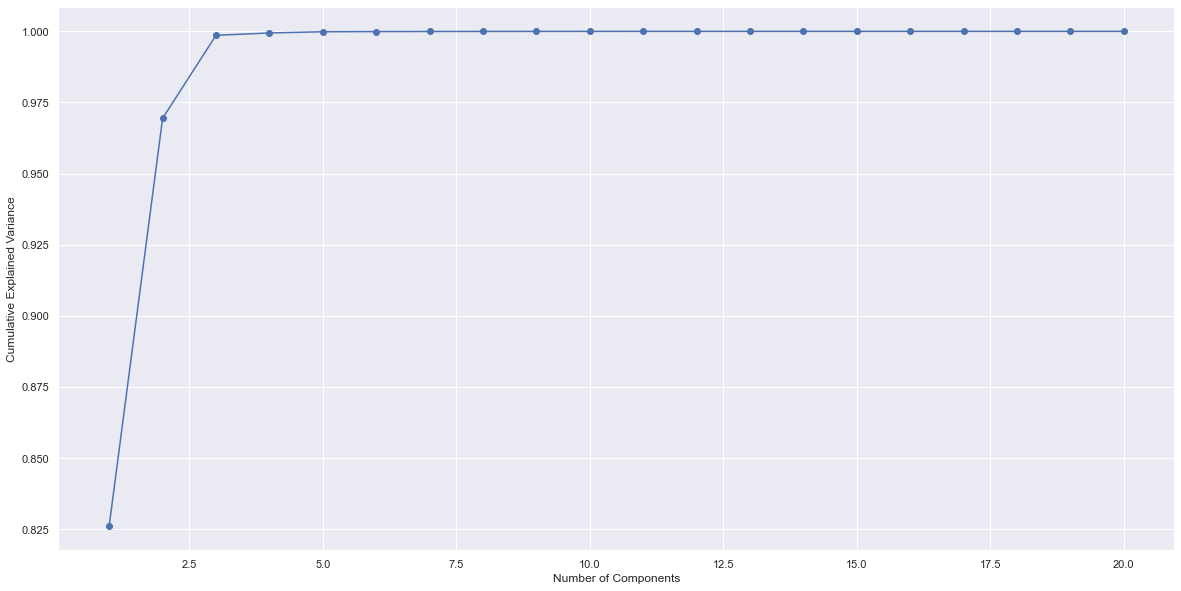

In [18]:
pca = PCA()
X_train_red = pca.fit_transform(X_train)

explained_variance = pca.explained_variance_ratio_

cumulative_explained_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [19]:
pca = PCA(n_components=4)
X_train_red = pca.fit_transform(X_train)
X_test_red = pca.transform(X_test)

### Logistic regression

In [20]:
from sklearn.model_selection import GridSearchCV

In [22]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [26]:
logreg = LogisticRegression()

paramsDict = {'penalty': [None,'l1','l2'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}

gridSearch =  GridSearchCV(logreg, paramsDict , scoring='accuracy')

gridSearch.fit(X_train_red, y_train)

print('Best parameters: {0}'.format(gridSearch.best_params_))
print('Best estimator: {0}'.format(gridSearch.best_estimator_))

bestLogReg = gridSearch.best_estimator_


y_pred_train = bestLogReg.predict(X_train_red)
y_pred_test = bestLogReg.predict(X_test_red)

print('Training accuracy: ' + str(accuracy_score(y_train, y_pred_train)))
print('Testing accuracy: ' + str(accuracy_score(y_test, y_pred_test)))
print('------------------------------------------')


c:\users\tinpa\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\tinpa\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\tinpa\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\tinpa\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\tinpa\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

Best parameters: {'C': 0.001, 'penalty': None}
Best estimator: LogisticRegression(C=0.001, penalty=None)
Training accuracy: 0.9549763033175356
Testing accuracy: 0.9645390070921985
------------------------------------------


c:\users\tinpa\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\tinpa\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\tinpa\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\tinpa\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\users\tinpa\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

### SVM

In [28]:
from sklearn.svm import SVC
svc = SVC()

paramsDict = {'C': [ 0.01, 0.1, 1, 10, 100],
              'kernel': ['linear','poly','rbf', 'sigmoid'],
              'gamma': ['scale', 'auto', 0.001, 0.01, 0.1]}

gridSearch = GridSearchCV(svc, paramsDict, scoring='accuracy')


gridSearch.fit(X_train_red, y_train)

print('Best parameters: {0}'.format(gridSearch.best_params_))
print('Best estimator: {0}'.format(gridSearch.best_estimator_))

bestSvc = gridSearch.best_estimator_

y_pred_train = bestSvc.predict(X_train_red)
y_pred_test = bestSvc.predict(X_test_red)

print('Training accuracy: ' + str(accuracy_score(y_train, y_pred_train)))
print('Testing accuracy: ' + str(accuracy_score(y_test, y_pred_test)))
print('------------------------------------------')

Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best estimator: SVC(C=10, kernel='linear')
Training accuracy: 0.9549763033175356
Testing accuracy: 0.9645390070921985
------------------------------------------


### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
randfor = RandomForestClassifier()

paramsDict =  {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


gridSearch = GridSearchCV(randfor, paramsDict, scoring='accuracy')

gridSearch.fit(X_train_red, y_train)

print('Best parameters: {0}'.format(gridSearch.best_params_))
print('Best estimator: {0}'.format(gridSearch.best_estimator_))

bestRandFor = gridSearch.best_estimator_

y_pred_train = bestRandFor.predict(X_train_red)
y_pred_test = bestRandFor.predict(X_test_red)

print('Training accuracy: ' + str(accuracy_score(y_train, y_pred_train)))
print('Testing accuracy: ' + str(accuracy_score(y_test, y_pred_test)))
print('------------------------------------------')

Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best estimator: RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)
Training accuracy: 0.9928909952606635
Testing accuracy: 0.9290780141843972
------------------------------------------


### Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB

In [98]:
gnb = GaussianNB()

paramsDict = {'var_smoothing': [1e-9,1e-8,1e-7, 1e-6]}

gridSearch = GridSearchCV(gnb, paramsDict, scoring='accuracy')

gridSearch.fit(X_train_red, y_train)

print('Best parameters: {0}'.format(gridSearch.best_params_))
print('Best estimator: {0}'.format(gridSearch.best_estimator_))

bestGnb = gridSearch.best_estimator_

y_pred_train = bestGnb.predict(X_train_red)
y_pred_test = bestGnb.predict(X_test_red)

print('Training accuracy: ' + str(accuracy_score(y_train, y_pred_train)))
print('Testing accuracy: ' + str(accuracy_score(y_test, y_pred_test)))
print('------------------------------------------')

Best parameters: {'var_smoothing': 1e-09}
Best estimator: GaussianNB()
Training accuracy: 0.9123222748815166
Testing accuracy: 0.8794326241134752
------------------------------------------


### Decision tree

In [99]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
dectree = DecisionTreeClassifier()

paramsDict = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,2,4]
              }

gridSearch = GridSearchCV(dectree, paramsDict, scoring='accuracy')

gridSearch.fit(X_train_red, y_train)

print('Best parameters: {0}'.format(gridSearch.best_params_))
print('Best estimator: {0}'.format(gridSearch.best_estimator_))

bestDecTree = gridSearch.best_estimator_

y_pred_train = bestDecTree .predict(X_train_red)
y_pred_test = bestDecTree .predict(X_test_red)

print('Training accuracy: ' + str(accuracy_score(y_train, y_pred_train)))
print('Testing accuracy: ' + str(accuracy_score(y_test, y_pred_test)))
print('------------------------------------------')

Best parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Best estimator: DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=2)
Training accuracy: 0.981042654028436
Testing accuracy: 0.9078014184397163
------------------------------------------


### KNN

In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
neigh = KNeighborsClassifier()


paramsDict = {'n_neighbors':[3,5,6,9],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]
              }

gridSearch = GridSearchCV(neigh, paramsDict, scoring='accuracy')


gridSearch.fit(X_train_red, y_train)

print('Best parameters: {0}'.format(gridSearch.best_params_))
print('Best estimator: {0}'.format(gridSearch.best_estimator_))

bestNeigh = gridSearch.best_estimator_

y_pred_train = bestNeigh.predict(X_train_red)
y_pred_test = bestNeigh.predict(X_test_red)

print('Training accuracy: ' + str(accuracy_score(y_train, y_pred_train)))
print('Testing accuracy: ' + str(accuracy_score(y_test, y_pred_test)))
print('------------------------------------------')

Best parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best estimator: KNeighborsClassifier(n_neighbors=9, p=1)
Training accuracy: 0.9123222748815166
Testing accuracy: 0.9219858156028369
------------------------------------------
